<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/KicapSambal/TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Automated Feature Engineering Tools Assignment** using **TPOT**


---




**TEAM MEMBERS:**
```
ZUHAYR ARIF BIN ZAKARIA (MCS231002)
MOHD NOR BIN MOHIDIN (MCS231008)
NABILA HUSNA BINTI ROSLI (MCS231009)
NUR AZIMAH BINTI MOHD SALLEH (MCS231011)
```

###**Dataset Selection**

##**FLIGHT PRICE PREDICTION**

###**Dataset**
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

###**Features**
The various features of the cleaned dataset are explained below:
1. `Airline`: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. `Flight`: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. `Departure Time`: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. `Stops`: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. `Arrival Time`: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. `Destination City`: City where the flight will land. It is a categorical feature having 6 unique cities.
8. `Class`: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. `Duration`: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. `Days Left`: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. `Price`: Target variable stores information of the ticket price.



---



###**Loading the Dataset**

In [1]:
# Upload kaggle.json API token, and download / unzip the Flight Price Prediction dataset

# Install and upload the kaggle.json file
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shubhambathwal/flight-price-prediction

Saving kaggle.json to kaggle.json
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 48.1MB/s]


In [2]:
!unzip flight-price-prediction.zip

Archive:  flight-price-prediction.zip
  inflating: Clean_Dataset.csv       
  inflating: business.csv            
  inflating: economy.csv             


In [62]:
# Import pandas
import pandas as pd

# Load the dataset
df = pd.read_csv('Clean_Dataset.csv').head(3000) # read clean dataset



---



###**Exploratory Data Analysis (EDA)**

In [48]:
# Import necessaries libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3000 non-null   int64  
 1   airline           3000 non-null   object 
 2   flight            3000 non-null   object 
 3   source_city       3000 non-null   object 
 4   departure_time    3000 non-null   object 
 5   stops             3000 non-null   object 
 6   arrival_time      3000 non-null   object 
 7   destination_city  3000 non-null   object 
 8   class             3000 non-null   object 
 9   duration          3000 non-null   float64
 10  days_left         3000 non-null   int64  
 11  price             3000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 281.4+ KB
None


In [64]:
# Check dataframe shape
df.shape

(3000, 12)

In [37]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Check for missing values
df.isnull().sum()

In [ ]:
# Summary statistics
df.describe()

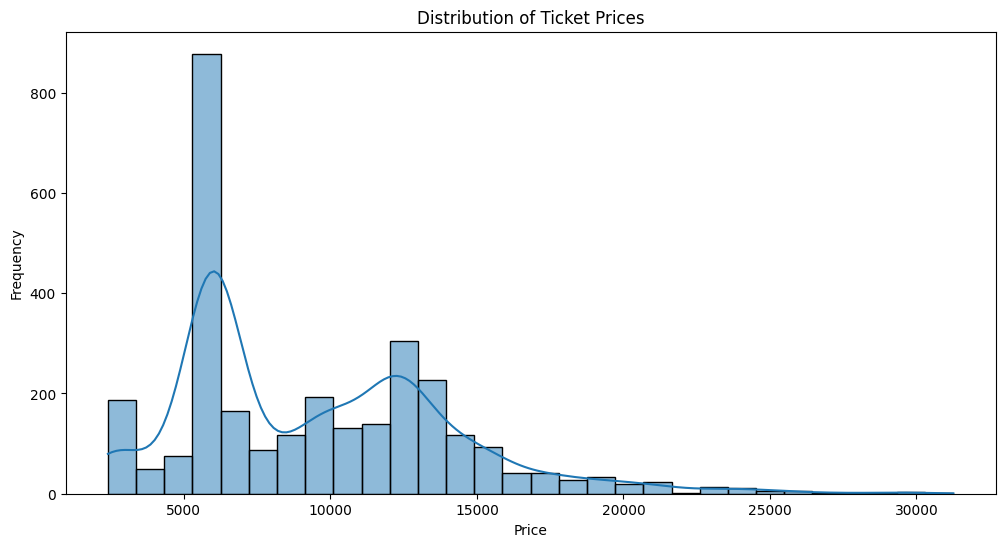

In [92]:
# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

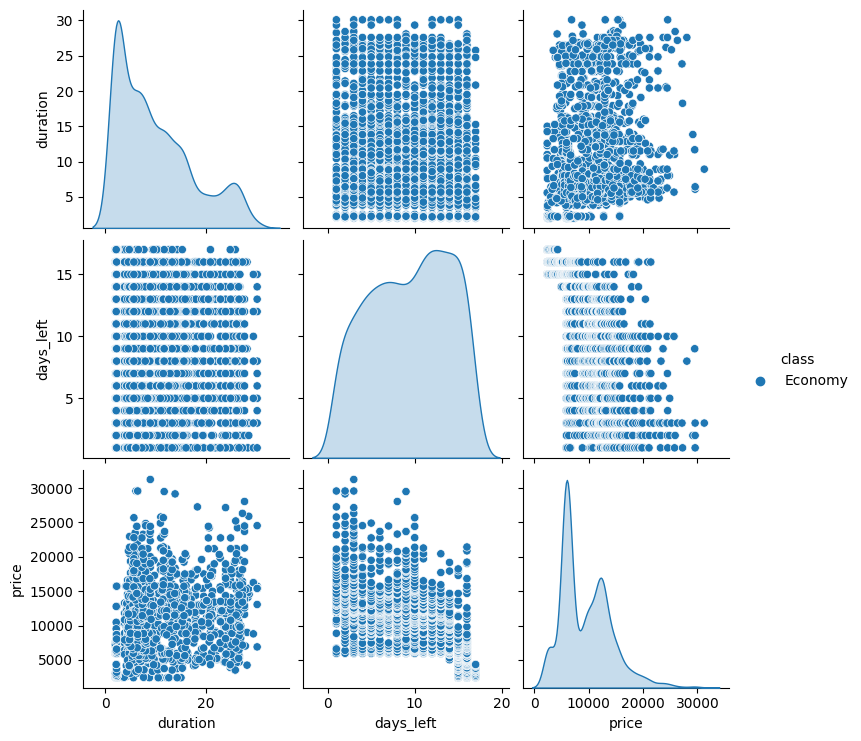

In [90]:
# Visualize relationships between features and the target variable
sns.pairplot(df, vars=['duration', 'days_left', 'price'], hue='class')
plt.show()

<ipython-input-91-169d0e4d6eaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


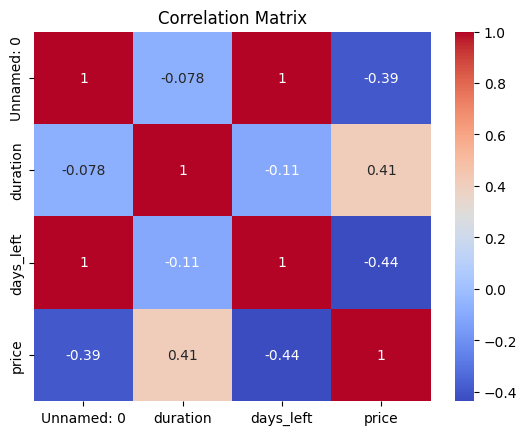

In [91]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [54]:
# Explore unique values in categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'airline': ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in 'flight': ['SG-8709' 'SG-8157' 'I5-764' 'UK-995' 'UK-963' 'UK-945' 'UK-927' 'UK-951'
 'G8-334' 'G8-336' 'G8-392' 'G8-338' '6E-5001' '6E-6202' '6E-549'
 '6E-6278' 'AI-887' 'AI-665' 'I5-747' 'G8-266' 'G8-101' 'G8-103' 'AI-441'
 '6E-5328' 'UK-933' '6E-2046' 'I5-744' 'SG-8169' '6E-5041' 'G8-165'
 '6E-2373' 'UK-813' 'UK-817' 'UK-819' 'UK-801' 'UK-815' 'AI-453' 'SG-2976'
 'AI-504' 'AI-502' 'AI-506' 'AI-803' 'AI-479' 'SG-339' 'UK-955' 'UK-627'
 'I5-784' 'AI-9643' 'AI-540' 'AI-429' 'AI-439' 'AI-9645' '6E-2193'
 '6E-2168' '6E-152' '6E-369' 'UK-899' 'AI-764' 'UK-747' 'UK-809' 'UK-737'
 '6E-2338' 'G8-237' 'UK-871' 'AI-762' 'G8-1404' 'AI-512' 'AI-537' 'UK-977'
 '6E-184' 'SG-3002' '6E-2102' 'AI-801' 'UK-637' 'UK-835' 'AI-531' 'UK-705'
 'UK-707' 'UK-673' 'AI-839' 'UK-879' 'G8-191' 'AI-767' 'AI-401' 'AI-473'
 'G8-213' 'AI-409' 'UK-837' 'AI-877' 'SG-8803' 'UK-985' 'UK-953' 'G8-346'
 'G8-330' '



---



###**Feature Engineering with Automated Tools**

In [10]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=9f8cf2e93cf7ca9672f76d3a211e16f3f56ccead450e09250fe7f7f9852b1e0b
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [75]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

In [65]:
# Drop unnecessary columns for TPOT
#X = df.drop(['price', 'Unnamed: 0'], axis=1)
X = df.drop(['price'], axis=1)
y = df['price']

# We want to predict the target variable, which is price in this case.
# The features (X) are used to train the model, and
# the target variable (y) is what the model tries to predict.

In [66]:
# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [68]:
# Use TPOT to perform automated feature engineering
tpot = TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2, n_jobs=-1)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2736331.433567009

Generation 2 - Current best internal CV score: -2736331.433567009

Generation 3 - Current best internal CV score: -2633631.2566614076

Generation 4 - Current best internal CV score: -2633631.2566614076

Generation 5 - Current best internal CV score: -2535219.280317896

Best pipeline: GradientBoostingRegressor(StandardScaler(input_matrix), alpha=0.95, learning_rate=1.0, loss=huber, max_depth=3, max_features=0.9500000000000001, min_samples_leaf=17, min_samples_split=6, n_estimators=100, subsample=0.9000000000000001)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              verbosity=2)

In [69]:
# Evaluate the best pipeline on the test set
tpot.score(X_test, y_test)

-1788311.9177366064

In [73]:
# Get the feature importances from the best pipeline
best_pipeline = tpot.fitted_pipeline_
feature_importances = best_pipeline.steps[-1][1].feature_importances_



---



###**Feature Selection**

In [76]:
# Select the most important features using a threshold
sfm = SelectFromModel(GradientBoostingRegressor(), threshold='median')
sfm.fit(X_encoded, y)

SelectFromModel(estimator=GradientBoostingRegressor(), threshold='median')

In [77]:
# Transform the dataset to keep only the selected features
X_selected = sfm.transform(X_encoded)

In [78]:
X_selected

array([[0.000e+00, 2.170e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.330e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 2.170e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [2.997e+03, 2.475e+01, 1.700e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.998e+03, 2.170e+00, 1.700e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [2.999e+03, 2.170e+00, 1.700e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00]])



---



###**Visualization**

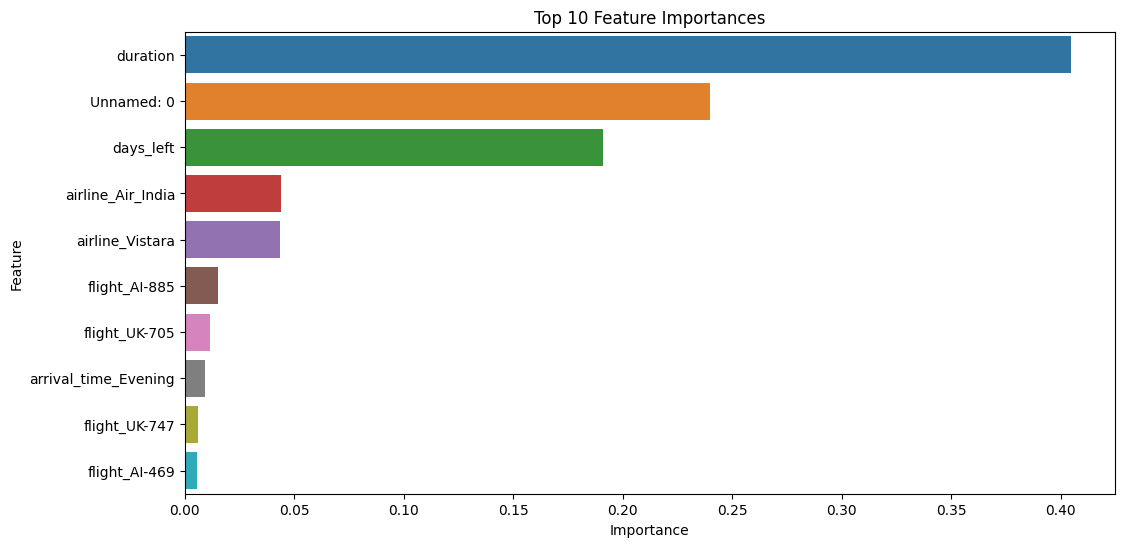

In [85]:
# Visualize the feature importances
# Check lengths before sorting
if len(feature_importances) != len(X_encoded.columns):
    raise ValueError("Length mismatch between feature_importances and X_encoded.columns")

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_encoded.columns[sorted_indices]

# Select the top 10 features
top_n = 10
top_feature_importances = sorted_feature_importances[:top_n]
top_feature_names = sorted_feature_names[:top_n]

# Visualize the top 10 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=top_feature_importances, y=top_feature_names)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [83]:
print("Length of feature_importances:", len(feature_importances))
print("Number of columns in X_encoded:", len(X_encoded.columns))


Length of feature_importances: 240
Number of columns in X_encoded: 240




---



###**Conclusion**

In [88]:
# Conclusion
print("The top 10 most important features for predicting flight prices are:")
for feature, importance in zip(top_feature_names, top_feature_importances):
    print(f"{feature}: {importance:.4f}")

The top 10 most important features for predicting flight prices are:
duration: 0.4045
Unnamed: 0: 0.2400
days_left: 0.1909
airline_Air_India: 0.0438
airline_Vistara: 0.0432
flight_AI-885: 0.0149
flight_UK-705: 0.0116
arrival_time_Evening: 0.0090
flight_UK-747: 0.0059
flight_AI-469: 0.0055


From the result we obtain on the final line of code, the top most important features for predicting flighr prices: -
1. **`Duration (40.45%)`**: The total duration of the flight is the most significant factor influencing flight prices. Longer flights typically incur higher costs due to increased fuel consumption and operational expenses.

2. **`Days Left (19.09%)`**: The number of days left between the booking date and the trip date is an important factor. Airlines may adjust prices based on the proximity to the departure date, considering factors like demand and seat availability.

3. **`Airline - Air India (4.38%)`**: The choice of airline, specifically Air India, plays a role in determining flight prices. Different airlines may have varying pricing strategies, services, and reputations.

4. **`Airline - Vistara (4.32%):`** Similar to Air India, the airline Vistara also contributes to the variation in flight prices. Passengers may have preferences for specific airlines, impacting pricing dynamics.

5. **`Flight - AI-885 (1.49%)`**: Certain flight codes, such as AI-885, demonstrate a minor influence on prices. This could be associated with specific routes, aircraft types, or other operational factors.

6. **`Flight - UK-705 (1.16%)`**: Similarly, the flight with code UK-705 shows a slight impact on prices. Further investigation into the characteristics of these flights may reveal insights.

7. **` Arrival Time - Evening (0.90%)`**: The time of day when the flight arrives, particularly in the evening, contributes to price determination. This could be related to traveler preferences or demand patterns.

 The code performs basic exploratory data analysis, uses TPOT for automated feature engineering, and selects the most important features based on feature importances. Finally, it visualizes the feature importances and displays the updated dataset with selected features.